<a href="https://colab.research.google.com/github/Manjari-001/Bike-Demand-Prediction/blob/main/ML_Regression_Capstone__Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Set Information:

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

# Attribute Information:

- Date : year-month-day
- Rented Bike count - Count of bikes rented at each hour
- Hour - Hour of he day
- Temperature-Temperature in Celsius
- Humidity - %
- Windspeed - m/s
- Visibility - 10m
- Dew point temperature - Celsius
- Solar radiation - MJ/m2
- Rainfall - mm
- Snowfall - cm
- Seasons - Winter, Spring, Summer, Autumn
- Holiday - Holiday/No holiday
- Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing Data Set
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path="/content/drive/MyDrive/Colab Notebooks/Almabetter/Capstone Projects/Ml_regression_Capston_project/SeoulBikeData.csv"

In [ ]:
df=pd.read_csv(path,encoding='ISO-8859-1')
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


# Exploratory Data Analysis

In [ ]:
print("rows: ", df.shape[0])
print("columns: ", df.shape[1])

rows:  8760
columns:  14


In [ ]:
df.size

122640

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

### As we see, there are 8760 observations with 14 variables.there is no missing Values present in Dataset.

In [ ]:
df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [ ]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


# Data Cleaning

## Checking missing values

In [ ]:
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

## Checking Outliers

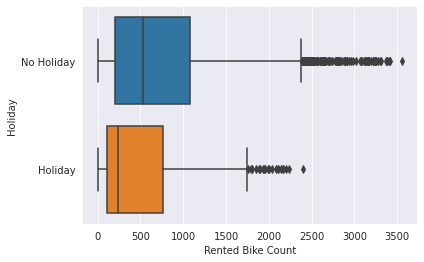

In [ ]:
sns.boxplot(x=df["Rented Bike Count"],y=df["Holiday"],data=df)

In [ ]:
sns.boxplot(x=df["Rented Bike Count"],y=df["Seasons"],data=df)

In [ ]:
# sns.pairplot(df)

In [ ]:
df['Date']=pd.to_datetime(df['Date'],format="%d/%m/%Y")
df['Date'].head()

In [ ]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [ ]:
df.head()

In [ ]:
df.nunique()

# Data Visualization

In [ ]:
df['Temperature(°C)'].plot(kind='hist')
plt.show()

In [ ]:
df['Humidity(%)'].plot(kind='hist')
plt.show()

In [ ]:
sns.countplot(x="Holiday", data=df)

In [ ]:
#Mapping the Variables
df['Functioning_Day']=df['Functioning Day'].map({'Yes':1,'No':0})
df['IsHoliday']=df['Holiday'].map({'No Holiday':0,'Holiday':1})

In [ ]:
# barplots('Hour','Rent Bike Count','Functioning Day')
# hue=['IsRainfall','IsSnowfall','IsSolar_Radiation','IsVisibility','Seasons']
# for i in hue:
#     barplots('Hour','Rent_Bike_Count',i)
#     plt.show()

In [ ]:
sns.countplot(x="Year", data=df)
plt.show()

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
Month = df.groupby("Month").sum()
Month.head()

In [ ]:
Month = df.groupby("Month").sum().reset_index()
sns.barplot(x="Month", y="Rented Bike Count", data=Month)
plt.xticks(rotation=90);

In [ ]:
sns.countplot(x="Seasons",data=df)

In [ ]:
Day = df.groupby("Day").sum().reset_index()
sns.barplot(x="Day", y="Rented Bike Count", data=Day)
plt.xticks(rotation=90);

In [ ]:
sns.lineplot(data=df, x="Hour", y="Rented Bike Count", hue="Seasons")
plt.show()

In [ ]:

df.groupby('Seasons').sum()['Rented Bike Count'].plot.pie()

In [ ]:
df.groupby('Temperature(°C)').mean()['Rented Bike Count'].plot()

**Here the amount of rented bikes is huge, when there is solar radiation, the counter of rents is around 1000**

In [ ]:
df['label_day_night']=df['Hour'].apply(lambda x : 'Night' if (x >20 or x<5) else( 'Day'))
boxplotDay_night= df.boxplot(['Rented Bike Count'],by='label_day_night',figsize=(7,7))

**According to this boxplot there are much more rents during the day than the night**

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)


In [ ]:
plt.figure(figsize=(2,4))
sns.heatmap(df.corr()[["Rented Bike Count"]].sort_values
            (by="Rented Bike Count", ascending=False)[1:],annot=True)
plt.show()

# Model Training:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor

## Splitting into X and Y

In [ ]:
df.head()

In [ ]:
X=df.drop('Rented Bike Count',axis=1)
y=df['Rented Bike Count']

In [ ]:
X.head()

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()
# df["Seasons"]=le.fit_transform(df["Seasons"])
# df["Holiday"]=le.fit_transform(df["Holiday"])
# df["Functioning Day"]=le.fit_transform(df["Functioning Day"])

In [ ]:
df.head()

In [ ]:
#Converting Contionus variable to categorical variable for ease in prediction
df['IsVisibility']=df['Visibility (10m)'].apply(lambda x: 1 if x>=2000 else 0)
df['IsRainfall']=df['Rainfall(mm)'].apply(lambda x:1 if x>=0.148687 else 0)
df['IsSnowfall']=df['Snowfall (cm)'].apply(lambda x:1 if x>=0.075068 else 0)
df['IsSolar_Radiation']=df['Solar Radiation (MJ/m2)'].apply(lambda x:1 if x>=0.56911 else 0)

#Mapping the Variables
df['Functioning_Day']=df['Functioning_Day'].map({'Yes':1,'No':0})
df['IsHoliday']=df['Holiday'].map({'No Holiday':0,'Holiday':1})

#Ater Conversion of numerical variable to categorical droping the original columns to avoid ambiguity
df.drop(['Date','Visibility (10m)','Rainfall(mm)','Snowfall (cm)','Solar Radiation (MJ/m2)','Holiday'],axis=1,inplace=True)

In [ ]:
def predict(ml_model,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=12)
    sc=StandardScaler()
    X_train=sc.fit_transform(X_train)
    X_test=sc.transform(X_test)
    model=ml_model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    plt.scatter(y_pred,y_test,color='b')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    overlay=(f'R^2 is {model.score(X_test,y_test)}\n Adj R^2 is {1-(1-model.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)}\n RMSE is: {mean_squared_error(y_test,y_pred,squared=False)}')
    plt.annotate(s=overlay,xy=(0,2500),size='x-large')

In [ ]:
predict(LinearRegression(),X,y)

In [ ]:
predict(DecisionTreeRegressor(),X,y)